In [2]:
pip install dmba

     |████████████████████████████████| 11.8 MB 4.3 MB/s 


In [3]:
from dmba import regressionSummary, exhaustive_search

no display found. Using non-interactive Agg backend


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [5]:
df = pd.read_csv("train.csv") 
dataset = pd.read_csv('train.csv') 
df.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               21263 non-null  int64  
 1   mean_atomic_mass                 21263 non-null  float64
 2   wtd_mean_atomic_mass             21263 non-null  float64
 3   gmean_atomic_mass                21263 non-null  float64
 4   wtd_gmean_atomic_mass            21263 non-null  float64
 5   entropy_atomic_mass              21263 non-null  float64
 6   wtd_entropy_atomic_mass          21263 non-null  float64
 7   range_atomic_mass                21263 non-null  float64
 8   wtd_range_atomic_mass            21263 non-null  float64
 9   std_atomic_mass                  21263 non-null  float64
 10  wtd_std_atomic_mass              21263 non-null  float64
 11  mean_fie                         21263 non-null  float64
 12  wtd_mean_fie      

In [7]:
df.nunique()

number_of_elements           9
mean_atomic_mass          3365
wtd_mean_atomic_mass     15164
gmean_atomic_mass         3365
wtd_gmean_atomic_mass    15165
                         ...  
range_Valence                7
wtd_range_Valence         5908
std_Valence                125
wtd_std_Valence           7082
critical_temp             3007
Length: 82, dtype: int64

In [8]:
df.describe()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
count,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,...,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000
mean,4.115224,87.557631,72.988310,71.290627,58.539916,1.165608,1.063884,115.601251,33.225218,44.391893,...,3.153127,3.056536,3.055885,1.295682,1.052841,2.041010,1.483007,0.839342,0.673987,34.421219
std,1.439295,29.676497,33.490406,31.030272,36.651067,0.364930,0.401423,54.626887,26.967752,20.035430,...,1.191249,1.046257,1.174815,0.393155,0.380291,1.242345,0.978176,0.484676,0.455580,34.254362
min,1.000000,6.941000,6.423452,5.320573,1.960849,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000210
25%,3.000000,72.458076,52.143839,58.041225,35.248990,0.966676,0.775363,78.512902,16.824174,32.890369,...,2.116732,2.279705,2.091251,1.060857,0.775678,1.000000,0.921454,0.451754,0.306892,5.365000
50%,4.000000,84.922750,60.696571,66.361592,39.918385,1.199541,1.146783,122.906070,26.636008,45.123500,...,2.618182,2.615321,2.434057,1.368922,1.166532,2.000000,1.063077,0.800000,0.500000,20.000000
75%,5.000000,100.404410,86.103540,78.116681,73.113234,1.444537,1.359418,154.119320,38.356908,59.322812,...,4.026201,3.727919,3.914868,1.589027,1.330801,3.000000,1.918400,1.200000,1.020436,63.000000
max,9.000000,208.980400,208.980400,208.980400,208.980400,1.983797,1.958203,207.972460,205.589910,101.019700,...,7.000000,7.000000,7.000000,2.141963,1.949739,6.000000,6.992200,3.000000,3.000000,185.000000


In [9]:
df.isnull().sum()

number_of_elements       0
mean_atomic_mass         0
wtd_mean_atomic_mass     0
gmean_atomic_mass        0
wtd_gmean_atomic_mass    0
                        ..
range_Valence            0
wtd_range_Valence        0
std_Valence              0
wtd_std_Valence          0
critical_temp            0
Length: 82, dtype: int64

In [10]:
plt.figure(figsize=(8,8))

mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, cmap='icefire')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
selected_features = ['entropy_atomic_mass', 'entropy_fie', 'entropy_atomic_radius', 
                     'entropy_FusionHeat', 'entropy_Valence', 'critical_temp']
df_ = df[selected_features]

plt.figure(figsize=(8,8))

corr = df_.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, cmap='icefire')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [12]:
X = df[df.columns[:-1]]
y = df[df.columns[-1]]

In [13]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [14]:
class PCA:
    def __init__(self,X):
        self.X=X

    def cum_explained_variance(X):

        num_components = X.shape[1]

        X_meaned = X - np.mean(X , axis = 0)

        cov_mat = np.cov(X_meaned , rowvar = False)

        eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
        
        sorted_index = np.argsort(eigen_values)[::-1]
        sorted_eigenvalue = eigen_values[sorted_index]
        explained_variance_ratio = [i/np.sum(eigen_values) for i in sorted_eigenvalue[:num_components]]
        cum_explained_variance = np.cumsum(explained_variance_ratio)
        return cum_explained_variance


    def fit(X,num_components):
 
        X_meaned = X - np.mean(X , axis = 0)

        cov_mat = np.cov(X_meaned , rowvar = False)

        eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)

        sorted_index = np.argsort(eigen_values)[::-1]
        sorted_eigenvectors = eigen_vectors[:,sorted_index]
        
        eigenvector_subset = sorted_eigenvectors[:,0:num_components]
        X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
        principalDf = pd.DataFrame(data = X_reduced)
        principalDf.columns = ['PC{}'.format(i) for i in range (1, len(principalDf.columns)+1)]
        
        return principalDf

In [15]:
cum_explained_variance = PCA.cum_explained_variance(X)
cum_explained_variance

array([0.38931798, 0.49414007, 0.58935207, 0.66842937, 0.7272512 ,
       0.76513489, 0.8013574 , 0.83242847, 0.8560396 , 0.87581839,
       0.89410206, 0.90868803, 0.9204725 , 0.93045804, 0.9402828 ,
       0.94809799, 0.95528592, 0.96072059, 0.96555386, 0.96937062,
       0.97239336, 0.97525888, 0.97782371, 0.97989482, 0.981867  ,
       0.98372988, 0.98543026, 0.98685619, 0.98811913, 0.98927039,
       0.99029449, 0.99125491, 0.99217417, 0.99289294, 0.99357786,
       0.99419877, 0.99476954, 0.99526251, 0.99569935, 0.99612203,
       0.99644816, 0.99675418, 0.99701116, 0.99724859, 0.99747212,
       0.99768749, 0.997884  , 0.99807157, 0.99825233, 0.99842756,
       0.99858394, 0.99873775, 0.99886446, 0.99898456, 0.99910242,
       0.99920788, 0.99929714, 0.99937851, 0.99945842, 0.99953023,
       0.999595  , 0.9996519 , 0.99969627, 0.99974023, 0.99977965,
       0.99981497, 0.99984716, 0.99987529, 0.9998981 , 0.99991868,
       0.99993681, 0.99995349, 0.99996825, 0.99997748, 0.99998

In [16]:
plt.plot(list(range(1,X.shape[1]+1)),cum_explained_variance)
plt.title('PCA')
plt.xlabel('Principal component index')
plt.ylabel('Cum Explained Variance')
plt.show()

In [17]:
X = PCA.fit(X,15)
X

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,3.664487,-0.991643,3.045260,-1.713725,-0.246057,0.203213,0.450996,-0.220078,-0.384088,-0.220391,-0.632356,0.150977,0.521104,0.018955,-0.250727
1,4.555468,0.214585,1.722873,-1.111493,-0.981005,1.011501,-0.245300,0.214118,0.408239,1.139334,-1.057394,0.565372,0.605459,0.010472,-0.825366
2,3.488176,-1.055167,3.130821,-1.811590,-0.296335,0.211822,0.485278,0.010470,-0.496751,-0.180617,-0.737590,0.143143,0.565999,0.019710,-0.277222
3,3.581284,-1.020144,3.084663,-1.760859,-0.270516,0.208458,0.466648,-0.108675,-0.439150,-0.199967,-0.684029,0.147397,0.542793,0.019172,-0.263621
4,3.809671,-0.948297,2.981358,-1.627398,-0.199680,0.188464,0.426050,-0.426505,-0.279207,-0.263086,-0.533304,0.156691,0.481157,0.019274,-0.226952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,-2.350607,0.387111,-1.449530,2.426772,-2.911041,1.754652,0.114288,-1.041992,-0.186578,-1.235675,1.220777,-0.381472,1.449390,0.293490,1.400358
21259,5.446209,0.780202,1.336464,0.290010,-1.142610,-0.236224,0.988120,-0.775729,0.324684,0.793209,1.033398,-0.073589,1.077442,0.188025,0.071977
21260,-10.477462,0.931943,1.572640,0.372598,0.214181,1.304829,-0.814939,0.052747,-0.720376,0.347597,-0.003665,-0.939783,-0.558038,0.903606,-0.272152
21261,-9.771885,1.001345,1.215602,0.872021,0.954733,0.674221,-0.754652,-1.624888,0.146395,0.065916,0.227885,-0.586942,-0.764900,1.059363,-0.479104


Creating Classes of All Regression Types

In [36]:
class LinearRegression:
    def __init__(self,X,y,learningRate,Tolerance,maxiteration,reg=False, gd=False, L2= False,L1=False) -> None:
        self.X=X
        self.y=y
        self.learnRate=learningRate
        self.Tolerance=Tolerance
        self.maxiteration=maxiteration
        self.gd = gd
        self.L2 = L2
        self.reg = reg
        self.L1 = L1


    def addx0(self,X):
        return np.column_stack([np.ones([X.shape[0],1]),X])
    
    def normalized(self,X):
        X_norm=self.addx0(X)
        return X_norm

    def closeFormSolution(self,X,y):
        w =  np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)      
        return w

    def closeFormSolutionL2(self,X,y):
        N = X.shape[1]
        I = np.identity(N)
        w =  np.linalg.inv(X.T.dot(X)+self.reg*I).dot(X.T).dot(y)
        return w     

        
    def gradientDescent(self,X,y):
        
        error=[]
        lasterror=float("inf")
        
        for t in tqdm(range(self.maxiteration)):
            self.w = self.w - self.learnRate*self.costderiviation(X,y)
            cur = self.RMSE(X,y)
            diff = lasterror - cur
            lasterror = cur
            
            error.append(cur)
            
            if diff<self.Tolerance:
                print("The model stopped - no further improvemnt")
                break
       
        self.plot_cost(error)
        print("SSE = ",self.sse(X,y))
        print("RMSE = ",self.RMSE(X,y))
        print("Diff = ", diff )

    def gradientDescentL1(self,X,y):
        
        error=[]
        lasterror=float("inf")
        for t in tqdm(range(self.maxiteration)):
            self.w = self.w - self.learnRate*self.costderiviationL1(X,y)
            
            cur = self.RMSE(X,y)
            diff = lasterror - cur
            lasterror = cur
            
            error.append(cur)
            
            if diff<self.Tolerance:
                print("The model stopped - no further improvemnt")
                break

        self.plot_cost(error) 
        print("SSE = ",self.sse(X,y))
        print("RMSE = ",self.RMSE(X,y)) 
        print("Diff = ", diff)  

    def gradientDescentL2(self,X,y):
        
        error=[]
        lasterror=float("inf")
        for t in tqdm(range(self.maxiteration)):
            self.w = self.w - self.learnRate*self.costderiviationL2(X,y)
            
            cur = self.RMSE(X,y)
            diff = lasterror - cur
            lasterror = cur
            
            error.append(cur)
            
            if diff<self.Tolerance:
                print("The model stopped - no further improvemnt")
                break

        self.plot_cost(error) 
        print("SSE = ",self.sse(X,y))
        print("RMSE = ",self.RMSE(X,y)) 
        print("Diff = ", diff)       


    def predict(self,X):
        return X.dot(self.w)
    
    def sse(self,X,y):
        y_hat=self.predict(X)
        sse = ((y_hat-y)**2).sum()
        return sse

    
    def RMSE(self,X,y):
        N = X.shape[0]
        sse = self.sse(X,y)
        RMSE = np.sqrt(sse/N)
        return RMSE

    
    def costfunction(self,X,y):
        return self.sse(X,y)/(2)

    def costderiviation(self,X,y):
        y_hat= self.predict(X)
        return(y_hat - y).dot(X)

    def costderiviationL1(self,X,y):
        f = self.costderiviation(X,y)
        f += (self.reg)*np.linalg.norm(self.w)
        return f       

    def costderiviationL2(self, X,y):
        f = self.costderiviation(X,y)
        f += (self.reg)*self.w
        return f        
       
    
    def fit(self):

        self.X = self.normalized(self.X)
   
        if  not self.gd and not self.L2:
            print("solving using norml equation - closed form solution")
            self.w = self.closeFormSolution(self.X,self.y)        
                  
        if  self.gd and not self.L2 and not self.L1:
            print("solving using gardient descent")
            self.w = np.ones(self.X.shape[1],dtype=np.float64)*0
            self.gradientDescent(self.X,self.y) 

        if  self.gd and self.L1:
            print("solving using gardient descent with L1")
            self.w = np.ones(self.X.shape[1],dtype=np.float64)*0
            self.gradientDescentL1(self.X,self.y) 
                 

        if  self.gd and self.L2:
            print("solving using gardient descent with L2")
            self.w = np.ones(self.X.shape[1],dtype=np.float64)*0
            self.gradientDescentL2(self.X,self.y)            



        return self.w
        
        
    def plot_cost(self,error):
        # Data for plotting
        s = np.array(error)
        t = np.arange(s.size)

        fig, ax = plt.subplots()
        ax.plot(t, s)

        ax.set(xlabel='iterations', ylabel='cost',
               title='cost trend')
        ax.grid()

        plt.legend(bbox_to_anchor=(1.05,1), loc=2, shadow=True)
        plt.show()



In [37]:
# Data wrangling 
import pandas as pd 

# Array math
import numpy as np 

# Quick value count calculator
from collections import Counter


class NodeRegression():
    """
    Class to grow a regression decision tree
    """
    def __init__(
        self, 
        Y: list,
        X: pd.DataFrame,
        min_samples_split=None,
        max_depth=None,
        depth=None,
        node_type=None,
        rule=None
    ):
        # Saving the data to the node 
        self.Y = Y 
        self.X = X

        # Saving the hyper parameters
        self.min_samples_split = min_samples_split if min_samples_split else 20
        self.max_depth = max_depth if max_depth else 5

        # Default current depth of node 
        self.depth = depth if depth else 0

        # Extracting all the features
        self.features = list(self.X.columns)

        # Type of node 
        self.node_type = node_type if node_type else 'root'

        # Rule for spliting 
        self.rule = rule if rule else ""

        # Getting the mean of Y 
        self.ymean = np.mean(Y)

        # Getting the residuals 
        self.residuals = self.Y - self.ymean

        # Calculating the mse of the node 
        self.mse = self.get_mse(Y, self.ymean)

        # Saving the number of observations in the node 
        self.n = len(Y)

        # Initiating the left and right nodes as empty nodes
        self.left = None 
        self.right = None 

        # Default values for splits
        self.best_feature = None 
        self.best_value = None 
        self.pred = []

    @staticmethod
    def get_mse(ytrue, yhat) -> float:
        """
        Method to calculate the mean squared error 
        """
        # Getting the total number of samples
        n = len(ytrue)

        # Getting the residuals 
        r = ytrue - yhat 

        # Squering the residuals 
        r = r ** 2

        # Suming 
        r = np.sum(r)

        # Getting the average and returning 
        return r / n

    @staticmethod
    def ma(x: np.array, window: int) -> np.array:
        """
        Calculates the moving average of the given list. 
        """
        return np.convolve(x, np.ones(window), 'valid') / window

    def best_split(self) -> tuple:
        """
        Given the X features and Y targets calculates the best split 
        for a decision tree
        """
        # Creating a dataset for spliting
        df = self.X.copy()
        df['Y'] = self.Y

        # Getting the GINI impurity for the base input 
        mse_base = self.mse

        # Finding which split yields the best GINI gain 
        #max_gain = 0

        # Default best feature and split
        best_feature = None
        best_value = None

        for feature in self.features:
            # Droping missing values
            Xdf = df.dropna().sort_values(feature)

            # Sorting the values and getting the rolling average
            xmeans = self.ma(Xdf[feature].unique(), 2)

            for value in xmeans:
                # Getting the left and right ys 
                left_y = Xdf[Xdf[feature]<value]['Y'].values
                right_y = Xdf[Xdf[feature]>=value]['Y'].values
                
                # Getting the means 
                left_mean = np.mean(left_y)
                right_mean = np.mean(right_y)

                # Getting the left and right residuals 
                res_left = left_y - left_mean 
                res_right = right_y - right_mean

                # Concatenating the residuals 
                r = np.concatenate((res_left, res_right), axis=None)

                # Calculating the mse 
                n = len(r)
                r = r ** 2
                r = np.sum(r)
                mse_split = r / n

                # Checking if this is the best split so far 
                if mse_split < mse_base:
                    best_feature = feature
                    best_value = value 

                    # Setting the best gain to the current one 
                    mse_base = mse_split

        return (best_feature, best_value)

    def grow_tree(self):
        """
        Recursive method to create the decision tree
        """
        # Making a df from the data 
        df = self.X.copy()
        df['Y'] = self.Y

        # If there is GINI to be gained, we split further 
        if (self.depth < self.max_depth) and (self.n >= self.min_samples_split):

            # Getting the best split 
            best_feature, best_value = self.best_split()

            if best_feature is not None:
                # Saving the best split to the current node 
                self.best_feature = best_feature
                self.best_value = best_value

                # Getting the left and right nodes
                left_df, right_df = df[df[best_feature]<=best_value].copy(), df[df[best_feature]>best_value].copy()

                # Creating the left and right nodes
                left = NodeRegression(
                    left_df['Y'].values.tolist(), 
                    left_df[self.features], 
                    depth=self.depth + 1, 
                    max_depth=self.max_depth, 
                    min_samples_split=self.min_samples_split, 
                    node_type='left_node',
                    rule=f"{best_feature} <= {round(best_value, 3)}"
                    )

                self.left = left 
                self.left.grow_tree()

                right = NodeRegression(
                    right_df['Y'].values.tolist(), 
                    right_df[self.features], 
                    depth=self.depth + 1, 
                    max_depth=self.max_depth, 
                    min_samples_split=self.min_samples_split,
                    node_type='right_node',
                    rule=f"{best_feature} > {round(best_value, 3)}"
                    )

                self.right = right
                self.right.grow_tree()

    def print_info(self, width=4):
        """
        Method to print the information about the tree
        """
        # Defining the number of spaces 
        const = int(self.depth * width ** 1.5)
        spaces = "-" * const
        
        if self.node_type == 'root':
            print("Root")
        else:
            print(f"|{spaces} Split rule: {self.rule}")
        print(f"{' ' * const}   | MSE of the node: {round(self.mse, 2)}")
        print(f"{' ' * const}   | Count of observations in node: {self.n}")
        print(f"{' ' * const}   | Prediction of node: {round(self.ymean, 3)}")   

    def print_tree(self):
        """
        Prints the whole tree from the current node to the bottom
        """
        self.print_info() 
        
        if self.left is not None: 
            self.left.print_tree()
           
        
        if self.right is not None:
            self.right.print_tree()
            
    def predict(self, Xtest):
        for i in range(0, len(Xtest)):
            self.predict_sub(Xtest.iloc[i])
        
    def predict_sub(self, obs):
        if (self.left is not None) and (obs[self.best_feature] <= self.best_value):
            self.left.predict_sub(obs) 
        elif (self.right is not None) and (obs[self.best_feature] > self.best_value):
            self.right.predict_sub(obs)
        else:
            print(round(np.mean(self.Y), 2))
                        
    def score(self, X, y):
        X = self.pandas_to_numpy(X)
        y = self.pandas_to_numpy(y)
        pred = self.predict(X)
        return -1. * np.mean((pred-y)**2)

    def pandas_to_numpy(self, x):
        if type(x) == type(pd.DataFrame()) or type(x) == type(pd.Series()):
            return x.to_numpy()
        if type(x) == type(np.array([1,2])):
            return x
        return np.array(x) 


In [38]:
class tree_regressor_helper:
    
    def __init__(self, max_depth = None, mode=None, n_features=None, criteria='std', seed=None):
        self.tree = self.tree_split()
        self.data_cols = None
        self.max_depth = max_depth
        self.current_depth = 0
        self.criteria = criteria
        self.mode = mode
        self.n_features = n_features
        if seed:
            self._seed = seed
            np.random.seed = seed

    class tree_split:
        def __init__(self,col=-1,value=None,results=None,label=None,tb=None,fb=None, filt=None):
            self.col=col 
            self.value=value 
            self.results=results 
            self.tb=tb 
            self.fb=fb 
            self.filt=filt 
    
    def get_mean_target_value(self, data):
        return np.mean(data)
    
    def split_data(self, X, y, colnum, value):
        splitter = None
        if isinstance(value, int) or isinstance(value,float):
            splitter = lambda x: x[colnum] >= value
        else:
            splitter = lambda x: x[colnum] == value
        split1 = [i for i,row in enumerate(X) if splitter(row)]
        split2 = [i for i,row in enumerate(X) if not splitter(row)]
        set1X = X[split1]
        set1Y = y[split1]
        set2X = X[split2]
        set2Y = y[split2]
        return set1X, set1Y, set2X, set2Y

    def split_criteria(self, y):
        if self.criteria == 'mae':
            mu = np.mean(y)
            return np.mean(np.abs(y-mu))
        else:
            return np.std(y) 
        
    def find_number_of_columns(self, X):
        if isinstance(self.n_features, int):
            return self.n_features
        if self.n_features == 'sqrt':
            return int(np.sqrt(X.shape[1])+0.5)
        if self.n_features == 'div3':
            return int(X.shape[1]/3+0.5)
        else:
            raise ValueError("Invalid n_features selection")
    
    def randomize_columns(self,X):
        num_col = self.find_number_of_columns(X)
        filt = np.random.choice(np.arange(0,X.shape[1]),num_col,replace=False)
        filtered_X = self.apply_filter(X, filt)
        return filtered_X, filt
    
    def apply_filter(self, X, filt):
        filtered_X = X.T[filt]
        return filtered_X.T
    
    def pandas_to_numpy(self, x):
        if type(x) == type(pd.DataFrame()) or type(x) == type(pd.Series()):
            return x.to_numpy()
        if type(x) == type(np.array([1,2])):
            return x
        return np.array(x) 
    
    def handle_1d_data(self,x):
        if x.ndim == 1:
            x = x.reshape(-1,1)
        return x
    
    def convert_to_array(self, x):
        x = self.pandas_to_numpy(x)
        x = self.handle_1d_data(x)
        return x
    
    def fit(self, X, y):
        self.tree = self._fit(X,y)
    
    def _fit(self, X, y, depth=0):
        X = self.convert_to_array(X)
        y = self.pandas_to_numpy(y)

        if len(X) == 0: return tree_split()
        current_score = self.split_criteria(y)

        best_gain = 0.0
        best_criteria = None
        best_sets = None
        
        self.data_cols = X.shape[1]
        
        if self.mode=='rfnode':
            _, cols = self.randomize_columns(X)
        else: 
            cols = [x for x in range(self.data_cols)]        
        
        
        for col in cols:
            column_values = set(X.T[col])
            for value in column_values:
                set1, set1_y, set2, set2_y = self.split_data(X, y, col, value)
                p = float(len(set1)) / len(y)
                gain = current_score - p*self.split_criteria(set1_y) - (1-p)*self.split_criteria(set2_y)
                if gain > best_gain and len(set1_y) and len(set2_y):
                    best_gain = gain
                    best_criteria = (col, value)
                    best_sets = (np.array(set1), np.array(set1_y), np.array(set2), np.array(set2_y))
        
        if (self.max_depth and depth < self.max_depth) or not self.max_depth:
            if best_gain > 0:
                self.current_depth += 1
                true_branch = self._fit(best_sets[0], best_sets[1], depth=depth+1)
                false_branch = self._fit(best_sets[2], best_sets[3], depth=depth+1)
                return self.tree_split(col=best_criteria[0], value=best_criteria[1],
                        tb=true_branch, fb=false_branch, filt=cols)
            else:
                return self.tree_split(results=self.get_mean_target_value(y))
        else:
            return self.tree_split(results=self.get_mean_target_value(y))

    def print_tree(self, indent="---"):
        self.__original_indent = indent
        self._print_tree_(self.tree, indent)
    
    def _print_tree_(self, tree, indent):
        if tree.results: # if this is a end node
            print(str(tree.results))
        else:
            print('Column ' + str(tree.col)+' : '+str(tree.value)+'? ')
            # Print the branches
            print(indent+' True: ', end=' ')
            next_indent = indent+self.__original_indent
            self._print_tree_(tree.tb,indent=next_indent)
            print(indent+' False: ', end=' ')
            self._print_tree_(tree.fb,indent=next_indent)

    def predict(self, newdata):
        results = []
        newdata = self.convert_to_array(newdata)
        for x in newdata:
            results.append(self._predict(x,self.tree))
        return np.array(results)
            
    def _predict(self, newdata, tree):
        if tree.results is not None: # if this is a end node
            return tree.results

        if isinstance(newdata[tree.col], int) or isinstance(newdata[tree.col],float):
            if newdata[tree.col] >= tree.value:
                return self._predict(newdata, tree.tb)

            else:
                return self._predict(newdata, tree.fb)
        else:
            if newdata[tree.col] == tree.value:
                return self._predict(newdata, tree.tb)
            else:
                return self._predict(newdata, tree.fb) 

    def score(self, X, y):
        X = self.pandas_to_numpy(X)
        y = self.pandas_to_numpy(y)
        pred = self.predict(X)
        return -1. *np.mean((pred-y)**2)

In [39]:
class random_forest_regressor:
    
    def __init__(self, n_trees = 10, max_depth=None, n_features='sqrt', mode='rfnode', seed=None, criteria='std'):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.n_features = n_features
        self.tree_filter_pairs = []
        self.mode = mode
        self.criteria = criteria
        if seed:
            self._seed = seed
            np.random.seed(seed)
        
    def find_number_of_columns(self, X):
        if isinstance(self.n_features, int):
            return self.n_features
        if self.n_features == 'sqrt':
            return int(np.sqrt(X.shape[1])+0.5)
        if self.n_features == 'div3':
            return int(X.shape[1]/3+0.5)
        else:
            raise ValueError("Invalid n_features selection")
    
    def get_bagged_data(self, X, y):
        index = np.random.choice(np.arange(len(X)),len(X))
        return X[index], y[index]
    
    def randomize_columns(self,X):
        num_col = self.find_number_of_columns(X)
        filt = np.random.choice(np.arange(0,X.shape[1]),num_col,replace=False)
        filtered_X = self.apply_filter(X, filt)
        return filtered_X, filt
    
    def apply_filter(self, X, filt):
        filtered_X = X.T[filt]
        return filtered_X.T
    
    def pandas_to_numpy(self, x):
        if type(x) == type(pd.DataFrame()) or type(x) == type(pd.Series()):
            return x.to_numpy()
        if type(x) == type(np.array([1,2])):
            return x
        return np.array(x) 

    def handle_1d_data(self,x):
        if x.ndim == 1:
            x = x.reshape(-1,1)
        return x
    
    def convert_to_array(self, x):
        x = self.pandas_to_numpy(x)
        x = self.handle_1d_data(x)
        return x
    
    def fit(self, X, y):
        X = self.convert_to_array(X)
        y = self.convert_to_array(y)
        try:
            self.base_filt = [x for x in range(X.shape[1])]
        except IndexError:
            self.base_filt = [0]
        for _ in range(self.n_trees):
            filt = self.base_filt
            bagX, bagy = self.get_bagged_data(X,y)
            if self.mode == 'rftree':
                bagX, filt = self.randomize_columns(bagX)
            new_tree = tree_regressor_helper(self.max_depth, mode=self.mode, 
                                               n_features=self.n_features, criteria=self.criteria)
            new_tree.fit(bagX, bagy)
            self.tree_filter_pairs.append((new_tree, filt))
    
    def predict(self, X):
        X = self.convert_to_array(X)
        self.predicts = []
        for tree, filt in self.tree_filter_pairs:
            filtered_X = self.apply_filter(X, filt)
            self.predicts.append(tree.predict(filtered_X))
        self.pred_by_row = np.array(self.predicts).T
        
        ensemble_predict = []
        for row in self.pred_by_row:
            ensemble_predict.append(np.mean(row))
        return ensemble_predict
    
    def score(self, X, y):
        pred = self.predict(X)
        print(pred)
        return  -1. *np.mean((np.array(pred)-np.array(y))**2)

Performing all types of Regression 

In [40]:
############################## Linear Regression #################################

In [41]:
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size = 0.25, random_state = 10)

In [42]:
#solving using norml equation - closed form solution
Regression_NE = LinearRegression(train_X,train_y,
                              learningRate= 0.000001, 
                              Tolerance= 0.005,
                              maxiteration= 50000,
                              gd= False,
                              reg= 0.5,
                              L2 = False
                              )
NE_wb=Regression_NE.fit()
pred_y = valid_X.dot(NE_wb[1:])+NE_wb[0]
regressionSummary(valid_y, pred_y)

solving using norml equation - closed form solution

Regression statistics

                      Mean Error (ME) : 0.0340
       Root Mean Squared Error (RMSE) : 21.8562
            Mean Absolute Error (MAE) : 17.3353
          Mean Percentage Error (MPE) : -519.3834
Mean Absolute Percentage Error (MAPE) : 2597.9384


In [43]:
#solving using gardient descent with L1
Regression_GDL1 = LinearRegression(train_X,train_y,
                              learningRate= 0.000001, 
                              Tolerance= 0.00005,
                              maxiteration= 50000,
                              gd= True,
                              reg= 0.5,
                              L1=True
                              )

GDL1_wb=Regression_GDL1.fit()

solving using gardient descent with L1


  1%|          | 308/50000 [00:00<01:21, 613.36it/s]
No handles with labels found to put in legend.


The model stopped - no further improvemnt
SSE =  7457024.969354935
RMSE =  21.62436192682671
Diff =  4.924049319754431e-05


In [44]:
pred_yL1 = valid_X.dot(GDL1_wb[1:])+GDL1_wb[0]
regressionSummary(valid_y, pred_yL1)


Regression statistics

                      Mean Error (ME) : 0.2812
       Root Mean Squared Error (RMSE) : 21.8577
            Mean Absolute Error (MAE) : 17.3274
          Mean Percentage Error (MPE) : -493.6851
Mean Absolute Percentage Error (MAPE) : 2601.7276


In [45]:
#Solving using gardient descent with L2
Regression_GDL2 = LinearRegression(train_X,train_y,
                              learningRate= 0.000001, 
                              Tolerance= 0.00005,
                              maxiteration= 50000,
                              gd= True,
                              reg= 0.5,
                              L2=True
                              )

GDL2_wb=Regression_GDL2.fit()

solving using gardient descent with L2


  1%|          | 308/50000 [00:00<01:15, 655.13it/s]
No handles with labels found to put in legend.


The model stopped - no further improvemnt
SSE =  7457022.807208061
RMSE =  21.62435879186001
Diff =  4.9207349878344075e-05


In [46]:
pred_y1L2 = valid_X.dot(GDL2_wb[1:])+GDL2_wb[0]
regressionSummary(valid_y, pred_y1L2)


Regression statistics

                      Mean Error (ME) : 0.2812
       Root Mean Squared Error (RMSE) : 21.8577
            Mean Absolute Error (MAE) : 17.3275
          Mean Percentage Error (MPE) : -493.8031
Mean Absolute Percentage Error (MAPE) : 2601.7611


In [ ]:
############################## Decision Tree Regression #################################

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2)

In [ ]:
root = NodeRegression(ytrain, Xtrain, max_depth=3, min_samples_split=5000)
root.grow_tree()
root.print_tree()

Root
   | MSE of the node: 1169.46
   | Count of observations in node: 17010
   | Prediction of node: 34.326
|-------- Split rule: PC1 <= 2.127
           | MSE of the node: 98.16
           | Count of observations in node: 7757
           | Prediction of node: 8.51
|---------------- Split rule: PC4 <= 5.513
                   | MSE of the node: 82.46
                   | Count of observations in node: 7478
                   | Prediction of node: 7.825
|------------------------ Split rule: PC1 <= -2.41
                           | MSE of the node: 35.14
                           | Count of observations in node: 5631
                           | Prediction of node: 5.987
|------------------------ Split rule: PC1 > -2.41
                           | MSE of the node: 185.01
                           | Count of observations in node: 1847
                           | Prediction of node: 13.43
|---------------- Split rule: PC4 > 5.513
                   | MSE of the node: 169.28
         

In [ ]:
pred_y_tree = root.predict(Xtest.reset_index().drop('index', axis = 1))

43.04
5.99
70.25
13.43
70.25
43.04
70.25
43.04
13.43
5.99
13.43
13.43
70.25
43.04
13.43
5.99
70.25
70.25
43.04
43.04
70.25
13.43
13.43
5.99
43.04
5.99
43.04
5.99
26.87
43.04
43.04
13.43
5.99
5.99
43.04
26.87
70.25
43.04
5.99
5.99
5.99
43.04
5.99
5.99
70.25
5.99
43.04
5.99
13.43
5.99
43.04
43.04
43.04
43.04
70.25
43.04
5.99
5.99
43.04
43.04
70.25
43.04
5.99
5.99
70.25
70.25
5.99
13.43
70.25
70.25
70.25
5.99
5.99
43.04
70.25
70.25
70.25
70.25
70.25
5.99
5.99
5.99
43.04
43.04
70.25
5.99
26.87
43.04
5.99
5.99
70.25
43.04
70.25
5.99
43.04
5.99
5.99
5.99
5.99
43.04
43.04
5.99
5.99
43.04
5.99
43.04
5.99
5.99
13.43
43.04
5.99
43.04
13.43
5.99
5.99
5.99
5.99
70.25
70.25
13.43
5.99
5.99
70.25
43.04
5.99
70.25
70.25
43.04
13.43
5.99
43.04
13.43
5.99
43.04
43.04
70.25
5.99
13.43
43.04
43.04
26.87
43.04
5.99
43.04
70.25
43.04
43.04
70.25
5.99
43.04
43.04
43.04
43.04
43.04
43.04
13.43
70.25
5.99
13.43
70.25
5.99
43.04
70.25
13.43
70.25
43.04
43.04
13.43
70.25
13.43
13.43
13.43
5.99
43.04
13.43
43.04

In [ ]:
root.score(pd.Dataframe(Xtest),pd.DataFrame(ytest))

NameError: name 'root' is not defined

In [ ]:
############################## Random Forest Regression #################################

In [ ]:
def train_test_split_custom(X, y, test_size=0.3, seed=None):

    def pandas_to_numpy(x):
        if type(x) == type(pd.DataFrame()) or type(x) == type(pd.Series()):
            return x.to_numpy()
        if type(x) == type(np.array([1,2])):
            return x
        return np.array(x)

    assert len(X) == len(y), "Length of records and labels must be equal!"
    X = pandas_to_numpy(X)
    y = pandas_to_numpy(y)

    if isinstance(test_size, float):
        if test_size < 0 or test_size > 1:
            raise ValueError("test_size must be an int, or between 0 and 1")
        test_size = int(len(y)*test_size)
    elif not isinstance(test_size, int):
        raise TypeError("test_size must be an int or a float")

    if seed:
        np.random.seed(seed)

    permute = np.random.permutation(len(y))
    X = X[permute]
    y = y[permute]
    return X[test_size:], X[:test_size], y[test_size:], y[:test_size]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split_custom(X,y,test_size=0.3)

In [ ]:
rf = random_forest_regressor(n_trees=2, n_features='sqrt', mode='rfnode', seed=42)
rf.fit(X_train, y_train)

/home/ood.discovery.neu.edu/software/anaconda3/2019.10/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/ood.discovery.neu.edu/software/anaconda3/2019.10/lib/python3.7/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/ood.discovery.neu.edu/software/anaconda3/2019.10/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
rf.score(X_test,y_test)

[17.7, 103.5, 31.266666666666666, 24.7, 41.0, 59.6, 18.4, 0.26861875, 77.2, 13.25, 59.49166666666666, 5.545, 8.9, 78.6, 4.550000000000001, 22.1, 55.0, 9.5975, 111.125, 93.75, 9.078571428571427, 50.4, 2.9335000000000004, 60.9, 21.3, 4.835, 7.34, 87.5, 78.0, 7.2924999999999995, 3.720833333333333, 1.595, 72.3, 105.1, 18.606249999999996, 23.2, 86.95, 86.6045616985495, 1.1010909090909091, 32.45, 81.75, 4.2316666666666665, 75.55, 5.195, 17.674999999999997, 62.45, 5.5, 26.25, 0.35530952380952385, 69.5, 61.65, 2.39, 18.175, 19.9375, 36.2, 19.549999999999997, 51.0, 51.15, 1.305, 52.0, 34.0, 2.67, 46.75, 96.0, 5.45, 54.125, 4.34, 106.5, 5.970000000000001, 91.0, 5.449272727272726, 0.855, 0.08149999999999999, 7.5249999999999995, 57.300000000000004, 104.0, 64.5, 2.74, 39.5, 69.0, 66.75, 1.2, 1.07, 110.96666666666667, 3.4, 59.5, 50.5, 86.6045616985495, 25.01, 0.5116666666666667, 80.5, 93.0, 35.400000000000006, 2.834, 72.31555555555556, 28.8, 117.16666666666666, 2.015, 2.9299999999999997, 89.25, 107.

-177.23832375770544

In [ ]:
####################### CLUSTERING ######################

In [ ]:
def PCA(X , num_components):
    X_meaned = X - np.mean(X , axis = 0)
    cov_mat = np.cov(X_meaned , rowvar = False)
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
     
    return X_reduced

In [ ]:
def calculate_cost(X, centroids, cluster):
  sum = 0
  for i, val in enumerate(X):
    sum += np.sqrt((centroids[int(cluster[i]), 0]-val[0])**2 +(centroids[int(cluster[i]), 1]-val[1])**2)
  return sum

def kmeans(X, k):
  diff = 1
  cluster = np.zeros(X.shape[0])
  centroids = X_df.sample(n=k).values
  while diff:
     for i, row in enumerate(X):
         mn_dist = float('inf')
         for idx, centroid in enumerate(centroids):
            d = np.sqrt((centroid[0]-row[0])**2 + (centroid[1]-row[1])**2)
            if mn_dist > d:
               mn_dist = d
               cluster[i] = idx
     new_centroids = pd.DataFrame(X).groupby(by=cluster).mean().values
     if np.count_nonzero(centroids-new_centroids) == 0:
        diff = 0
     else:
        centroids = new_centroids
  return centroids, cluster


In [ ]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(dataset.to_numpy())
X = pd.DataFrame(df_scaled, columns=dataset.columns)

X_pca = PCA(X, 2)

X_df = pd.DataFrame(X_pca, columns = ['PC1', 'PC2'])

X_pca

array([[ 0.75229095, -0.6219126 ],
       [ 0.94318977, -0.31306899],
       [ 0.71174955, -0.6445992 ],
       ...,
       [-2.00251979, -0.19386741],
       [-1.90540711, -0.09481242],
       [-1.05641651,  0.21557674]])

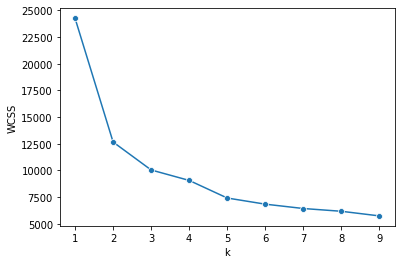

In [ ]:
cost_list = []
for k in range(1, 10):
    centroids, cluster = kmeans(X_pca, k)
    # WCSS (Within cluster sum of square)
    cost = calculate_cost(X_pca, centroids, cluster)
    cost_list.append(cost)
    
sns.lineplot(x=range(1,10), y=cost_list, marker='o')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.show()

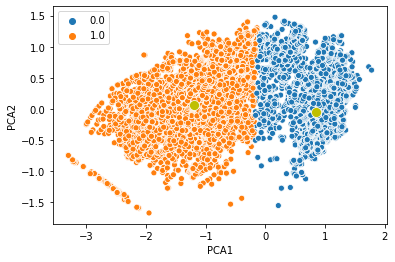

In [ ]:
k = 2
centroids, cluster = kmeans(X_pca, k)

sns.scatterplot(X_pca[:,0], X_pca[:, 1], hue=cluster)
sns.scatterplot(centroids[:,0], centroids[:, 1], s=100, color='y')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()